In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

0     000
1     000
2     000
3     000
4     000
5     000
6     000
7     001
8     001
9     001
10    001
11    001
12    001
13    001
14    010
15    010
16    010
17    010
18    010
19    010
20    010
21    011
22    011
23    011
24    011
25    011
26    011
27    011
28    100
29    100
30    100
31    100
32    100
33    100
34    100
35    101
36    101
37    101
38    101
39    101
40    101
41    101
42    110
43    110
44    110
45    110
46    110
47    110
48    110
49    111
50    111
51    111
52    111
53    111
54    111
55    111
Name: p1, dtype: object
0     001
1     010
2     011
3     100
4     101
5     110
6     111
7     000
8     010
9     011
10    100
11    101
12    110
13    111
14    000
15    001
16    011
17    100
18    101
19    110
20    111
21    000
22    001
23    010
24    100
25    101
26    110
27    111
28    000
29    001
30    010
31    011
32    101
33    110
34    111
35    000
36    001
37    010
38    011
39    100
40    110
41    

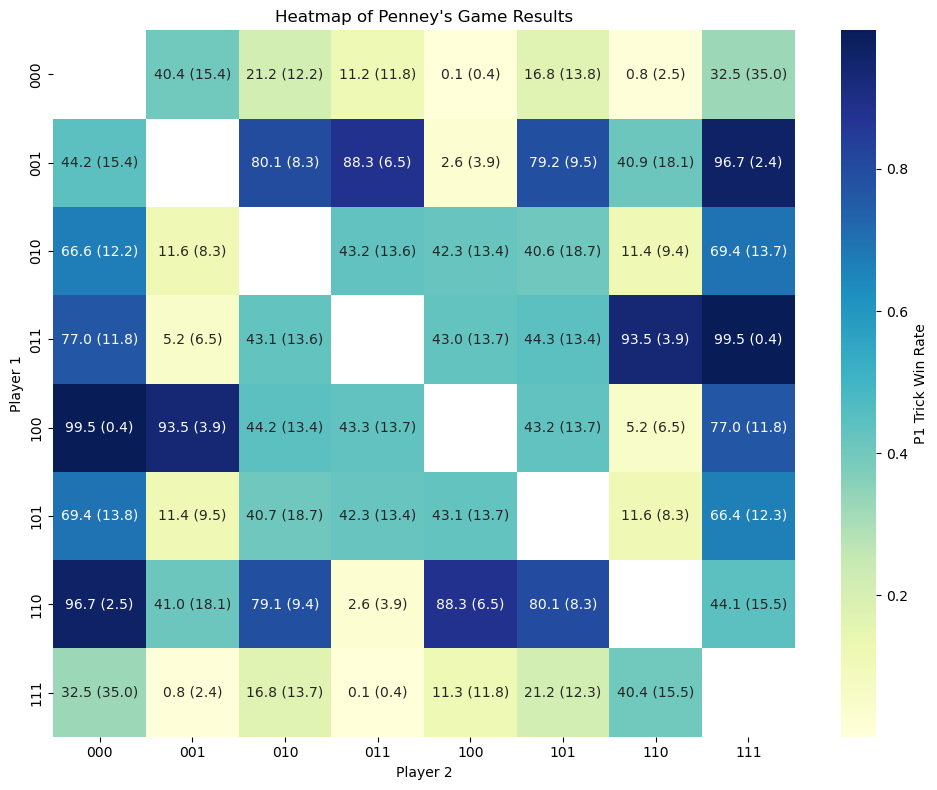

In [7]:
# Step 1: Load the data
df = pd.read_csv("C:/Users/kmand/DATA 440/Penney-Game/outputs/scoring_analysis", converters = {'p1': str, 'p2' : str})


# Step 2: Compute total tricks and win/draw rates
df["total_tricks"] = df["p1_wins_tricks"] + df["p2_wins_tricks"] + df["draws_tricks"]
df["p1_trick_win_rate"] = df["p1_wins_tricks"] / df["total_tricks"]
df["draw_trick_rate"] = df["draws_tricks"] / df["total_tricks"]

# Step 3: Create a pivot table with formatted annotations
# Format: "P1% (Draw%)"
df["annotation"] = df.apply(lambda row: f'{row["p1_trick_win_rate"]*100:.1f} ({row["draw_trick_rate"]*100:.1f})', axis=1)
print(df["p1"])
print(df["p2"])
# Get unique p1 and p2 combinations for axes
p1_values = sorted(df["p1"].unique())
p2_values = sorted(df["p2"].unique())

# Create a matrix of annotations
annotation_matrix = pd.DataFrame(index=p1_values, columns=p2_values)
print(p1_values, p2_values)

# Fill in the matrix with our formatted annotations
for _, row in df.iterrows():
    annotation_matrix.loc[row["p1"], row["p2"]] = row["annotation"]

# Also create a matrix of numerical values for coloring (just the win rate)
value_matrix = df.pivot(index="p1", columns="p2", values="p1_trick_win_rate")

# Step 4: Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(value_matrix, annot=annotation_matrix, fmt='', cmap="YlGnBu", cbar_kws={'label': 'P1 Trick Win Rate'})
plt.title("Heatmap of Penney's Game Results")
plt.xlabel("Player 2")
plt.ylabel("Player 1")
plt.tight_layout()
plt.show()